<a href="https://githubtocolab.com/alsinmr/WindeschleubaNMRSchool/blob/main/JupyterExercises/Sol2/sol1_one_spin_pulse_acquire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple one-spin pulse/acquire simulation and signal processing.
Note: Everything is in SI units for clarity, frequencies are in linear frequencies!

### 1) Imports

In [3]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

### 2) Build spin operator matrices

In [5]:
Ix = 1/2*np.array([[0,1],[1,0]])
Iy = 1/2*np.array([[0,-1j],[1j,0]])
Iz = 1/2*np.array([[1,0],[0,-1]])
E = np.eye(2)

### 3) Set Hamiltonian parameters and build the matrix

In [ ]:
offset = 4e3    #4 kHz offset
H0 = offset*Iz

### 4) Set simulation parameters

In [15]:
rho0 = Iz #starting density operator
pulseOp = Iy #pulse operator
detOp = Ix + 1j*Iy #detection operator

dt = 10e-6 #Sampling step, "dwell time"
nPoints = 1024 #length of acquisition
t=np.arange(1024)*dt

sig=np.zeros(nPoints,dtype=complex)

rho=rho0

### 5) Actual simulation

In [16]:
Upulse = expm(-1j*np.pi/2*pulseOp)
rho = Upulse@rho@Upulse.T.conj()

# build propagator of free evolution, and acquire
U0 = expm(-1j*2*np.pi*H0*dt)

for it in range(nPoints):
   sig[it]= np.trace(detOp@rho); # detect
   rho = U0@rho@U0.T.conj() # propagation

### 6) Plot real and imaginary part

(0.0, 10.23)

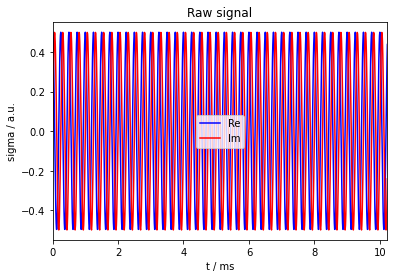

In [17]:
ax=plt.figure().add_subplot(111)
ax.set_title('Raw signal')
ax.plot(t*1e3,sig.real,color='blue')
ax.plot(t*1e3,sig.imag,color='red')
ax.set_xlabel('t / ms')
ax.set_ylabel('sigma / a.u.')
ax.legend(['Re','Im'])
ax.set_xlim([0,t[-1]*1e3])

### 7) Apodize with window function and plot

(0.0, 10.23)

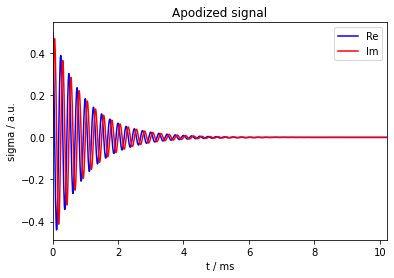

In [18]:
twin = 1e-3  #Apodization parameter
win = np.exp(-t/twin)

sig_apo = sig*win #Apply window to signal

ax=plt.figure().add_subplot(111)
ax.set_title('Apodized signal')
ax.plot(t*1e3,sig_apo.real,color='blue')
ax.plot(t*1e3,sig_apo.imag,color='red')
ax.set_xlabel('t / ms')
ax.set_ylabel('sigma / a.u.')
ax.legend(['Re','Im'])
ax.set_xlim([0,t[-1]*1e3])

### 8) Fourier transform with Zero-filling, construction of frequency vector

<IPython.core.display.Javascript object>


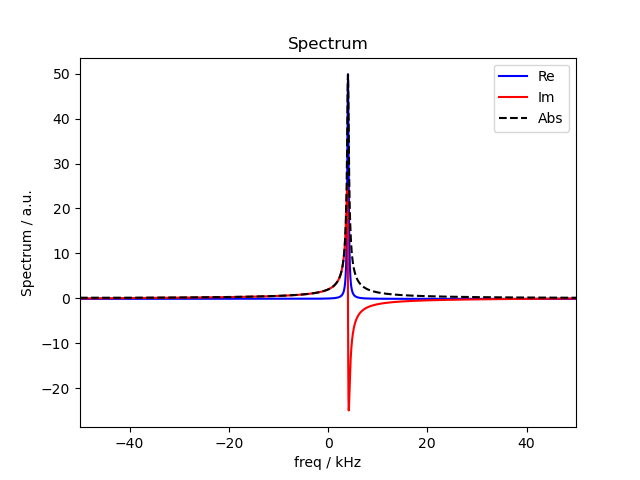

(-49.99999999999999, 49.95117187499999)

In [21]:
#fft with zerofilling two twice the original points
sig_apo[0]/=2
spec = np.fft.fftshift(np.fft.fft(sig_apo,2*nPoints));

#frequency vector
N=len(spec)
nyqFreq = 1/(2*dt)
unitAxis = 2/N * (np.arange(N)-np.fix(N/2))
freq = nyqFreq * unitAxis;

ax=plt.figure().add_subplot(111)
ax.set_title('Spectrum')
ax.plot(freq/1e3,spec.real,color='blue')
ax.plot(freq/1e3,spec.imag,color='red')
ax.plot(freq/1e3,np.abs(spec),color='black',linestyle='--')
ax.set_xlabel('freq / kHz')
ax.set_ylabel('Spectrum / a.u.')
ax.legend(['Re','Im','Abs'])
ax.set_xlim([freq[0]/1e3,freq[-1]/1e3])
